# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

* 가설1 : 집-직장거리가 이직에 영향을 미칠 것이다.

* 가설2 : 월급이 이직에 영향을 미칠 것이다.

* 가설3 : 전년대비 급여인상율이 이직에 영향을 미칠 것이다.

* 가설4 : 직무만족도가 이직에 영향을 미칠 것이다.

* 가설5 : 동료와의 관계가 이직에 영향을 미칠 것이다.

* 가설6 : 워라밸이 이직에 영향을 미칠 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) target : Attrition

In [16]:
target = 'Attrition'

In [18]:
data[target].unique()

array([0, 1])

In [19]:
data[target].value_counts()

0    1050
1     200
Name: Attrition, dtype: int64

In [105]:
data[target].isnull().sum()

0

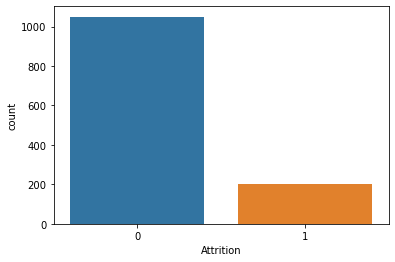

In [20]:
sns.countplot(data=data, x=target)
plt.show()

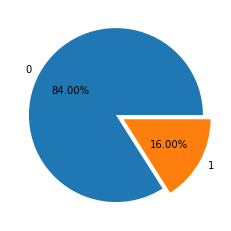

In [26]:
a = data[target].value_counts()

plt.pie(a.values, labels=a.index, autopct='%.2f%%', explode=[0,0.1])
plt.show()

> - 잔류직원이 80% 이상을 차지하고 있다.  
> - 많은 직원들이 잔류하는 방향으로 굳어질 것이라고 예상된다.

### 2) feature1 : DistanceFromHome

> 집-직장거리

In [29]:
feature1 = 'DistanceFromHome'

In [107]:
data[feature1].isnull().sum()

# 조치필요

54

In [31]:
data['DistanceFromHome'].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

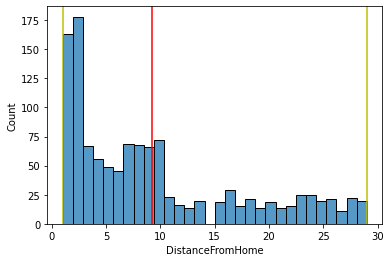

In [55]:
sns.histplot(data=data, x=feature1, bins=30)

plt.axvline(data[feature1].min(), color='y')
plt.axvline(data[feature1].mean(), color='r')
plt.axvline(data[feature1].max(), color='y')

plt.show()

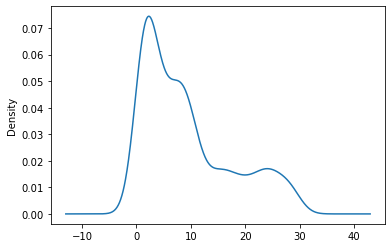

In [41]:
data[feature1].plot(kind='kde')
plt.show()

> - 약 25% 직원들이 2마일 내에 살고 있다.  
> - 그래프상 15마일 이하, 이상인 2그룹으로 나눠 분석해볼 수 있겠다.  

### 3) feature2 : MonthlyIncome

> 월급

In [43]:
feature2='MonthlyIncome'

In [46]:
data[feature2].describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [108]:
data[feature2].isnull().sum()

0

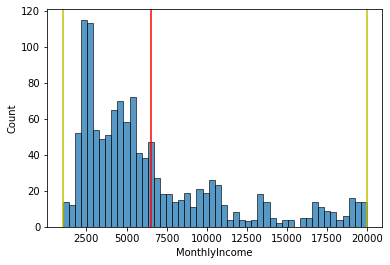

In [54]:
sns.histplot(data=data, x=feature2, bins=50)

plt.axvline(data[feature2].min(), color='y')
plt.axvline(data[feature2].mean(), color='r')
plt.axvline(data[feature2].max(), color='y')

plt.show()

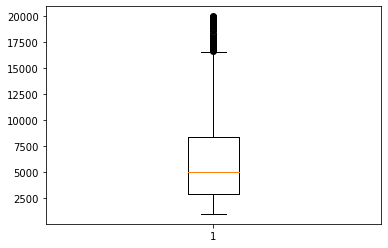

In [50]:
plt.boxplot(data=data, x=feature2)
plt.show()

> - 약 3,000달러에 많은 직원들이 분포한다.  
> - 이상치가 존재한다. (임원급 예상)

> - 그래프상 평균월급 이상, 이하 2분류로 나누어 분석해볼수 있겠다.

### 4) feature3 : PercentSalaryHike

> 전년대비 급여인상율

In [56]:
feature3 = 'PercentSalaryHike'

In [59]:
data[feature3].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [109]:
data[feature3].isnull().sum()

0

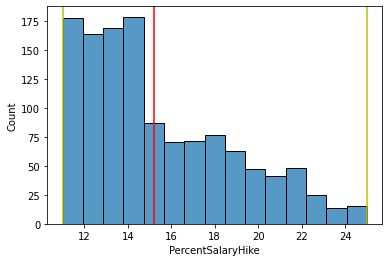

In [68]:
sns.histplot(data=data, x=feature3, bins=15)

plt.axvline(data[feature3].min(), color='y')
plt.axvline(data[feature3].mean(), color='r')
plt.axvline(data[feature3].max(), color='y')

plt.show()

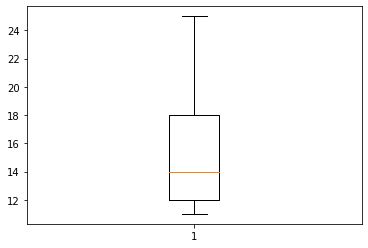

In [69]:
plt.boxplot(data=data, x=feature3)
plt.show()

> - 평균(약 15%) 이하에 많은 직원들이 분포한다.  
> - 이상치는 없다.

> - 평균 이상,이하 2분류로 나누어 분석해볼만 하다.

### 5) feature4 : JobSatisfaction

> 직무만족도

In [70]:
feature4 = 'JobSatisfaction'

In [76]:
a = data[feature4].value_counts()
a

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64

In [110]:
data[feature4].isnull().sum()

0

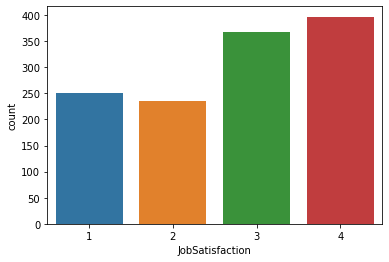

In [74]:
sns.countplot(data=data, x=feature4)
plt.show()

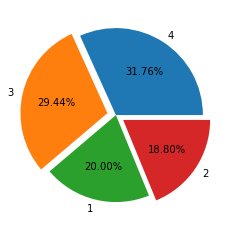

In [81]:
plt.pie(a.values, labels=a.index, autopct='%.2f%%', explode=[0,0.1,0,0.1])
plt.show()

> - 3,4에 약 60% 분포해있다. -> 설문조사시 익명성이 보장이 되는 상황일지? 의심해볼만함.
> - 만족이 많은 것으로 보아 이직률이 낮을 거라는 가설이 입증될수도?

### 6) feature5 : RelationshipSatisfaction

> 동료와의 관계

In [82]:
feature5 = 'RelationshipSatisfaction'

In [86]:
table_feature5=data[feature5].value_counts()
table_feature5

3    397
4    365
2    258
1    230
Name: RelationshipSatisfaction, dtype: int64

In [111]:
data[feature5].isnull().sum()

0

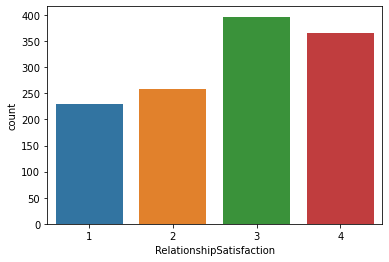

In [85]:
sns.countplot(data=data, x=feature5)
plt.show()

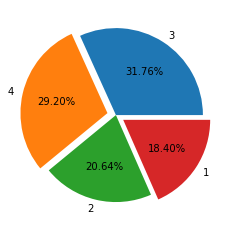

In [88]:
plt.pie(table_feature5.values, labels=table_feature5.index, autopct='%.2f%%', explode=[0,0.1,0,0.1])
plt.show()

> - 동료와의 만족이 약 60% 차지한다. -> 환경이 좋은 회사일 것 같음.
> - 동료와 만족도의 관계가 비슷한 것으로 분석이 둘을 묶어 가능할지?

### 7) feature6 : WorkLifeBalance

> 워라밸

In [89]:
feature6='WorkLifeBalance'

In [94]:
table_feature6 = data[feature6].value_counts()
table_feature6

3    747
2    297
4    137
1     69
Name: WorkLifeBalance, dtype: int64

In [112]:
data[feature6].isnull().sum()

0

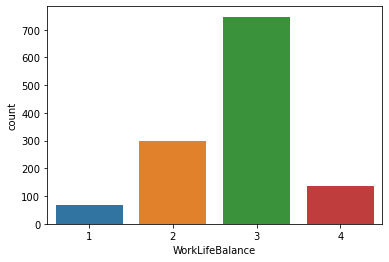

In [92]:
sns.countplot(data=data, x=feature6)
plt.show()

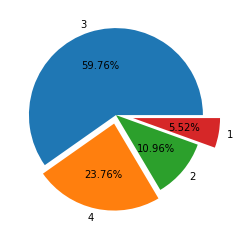

In [97]:
plt.pie(table_feature6.values, labels=table_feature5.index, autopct='%.2f%%', explode=[0,0.1,0,0.2])
plt.show()

> - 약 80% 이상이 워라밸이 보장된다고 하고 있다. -> 건강한 회사일 확률이 높다.

> - 전반적으로 직원들의 회사만족도가 높다. 월급의 문제가 없다면 이직률이 낮을 것이라 예상.

### 8) 추가 feature7 : OverTime

> 야근여부

In [177]:
feature7='OverTime'

In [181]:
table_feature7=data[feature7].value_counts()
table_feature7

No     896
Yes    354
Name: OverTime, dtype: int64

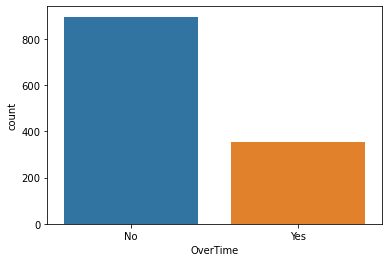

In [180]:
sns.countplot(data=data, x=feature7)
plt.show()

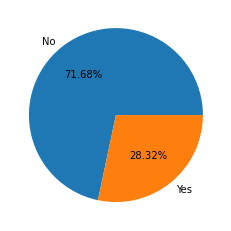

In [183]:
plt.pie(table_feature7.values, labels=table_feature7.index, autopct='%.2f%%', )
plt.show()

> - 7:3 비율로 야근 횟수가 적다.
> - 회사만족의 일부분으로 여겨질 수 있다.

### 9) 추가

In [244]:
# 직무만족도와 워라밸 모두 만족하지 않는 테이블

a1 = data['JobSatisfaction'] < 2
a2 = data['WorkLifeBalance'] < 2
data_a12 = data[(a1) & (a2)]
data_a12

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
164,0,46,1.0,Male,1,Single,17567,1.0,No,15,2,27,1
195,1,29,23.0,Female,1,Married,7336,1.0,No,13,1,11,1
241,0,52,8.0,Female,1,Married,2950,9.0,No,13,3,12,1
278,1,37,10.0,Male,1,Single,4213,1.0,No,15,2,10,1
321,1,41,5.0,Male,1,Divorced,2107,6.0,No,17,1,5,1
344,1,40,7.0,Male,1,Single,2166,3.0,Yes,14,2,10,1
374,0,48,1.0,Female,1,Married,15402,7.0,No,11,1,21,1
437,0,60,7.0,Female,1,Married,19566,5.0,No,11,4,33,1
561,0,35,18.0,Male,1,Married,5561,0.0,No,16,4,6,1
645,0,27,7.0,Female,1,Single,6811,8.0,No,19,1,9,1


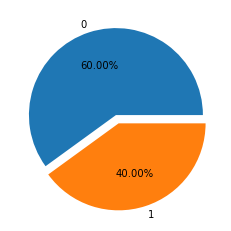

In [245]:
a = data_a12[target].value_counts()

plt.pie(a.values, labels=a.index, autopct='%.2f%%', explode=[0,0.1])
plt.show()

> - 기존 테이블에 비해 이직률이 증가했다. 만족도가 낮은 사람들의 당연한 현상?
> - 만족도 낮은 사람들 중 이직률별 월급차이가 클 것인가?

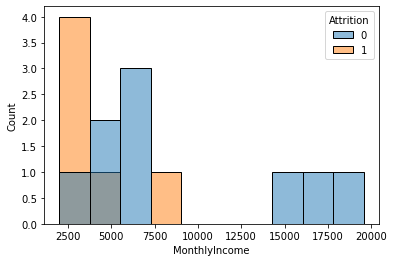

In [249]:
sns.histplot(data=data_a12, x='MonthlyIncome', hue=target, bins=10)
plt.show()

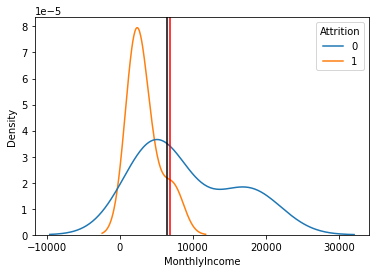

In [265]:

sns.kdeplot(data=data_a12, x='MonthlyIncome', hue=target, common_norm=True)

plt.axvline(data['MonthlyIncome'].mean(), color='k') # 기존의 월급 평균
plt.axvline(data_a12['MonthlyIncome'].mean(), color='r') # 만족도 낮은 사람들의 월급 평균
plt.show()

> - 만족도가 낮고, 월급이 낮은 사람들의 이직률은 압도적으로 높다.
> - 만족도가 낮고, 월급이 약 5000 이상인 사람들은 이직을 하지 않는 편이다.
> - 만족도가 낮은 사람들의 월급 평균이 오히려 높다?

### 10) 추가

In [237]:
#월급이 5000달러 이상인 사람들의 테이블

data_5000 = data[data['MonthlyIncome']>=5000]
data_5000

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,0,33,5.0,Male,4,Married,9998,6.0,No,13,1,8,4
1241,0,29,19.0,Male,3,Divorced,8620,1.0,No,14,3,10,3
1243,0,27,5.0,Male,4,Divorced,12808,1.0,Yes,16,2,9,3
1244,0,32,5.0,Female,2,Married,5878,3.0,No,12,1,12,3


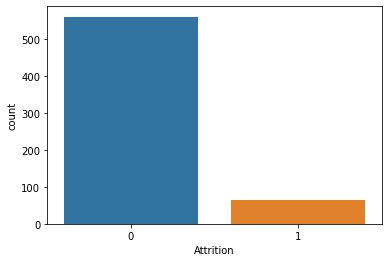

In [238]:
sns.countplot(data=data_5000, x='Attrition')
plt.show()

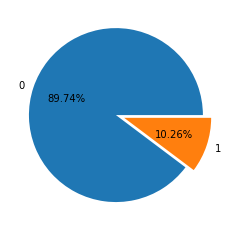

In [239]:
a = data_5000[target].value_counts()

plt.pie(a.values, labels=a.index, autopct='%.2f%%', explode=[0,0.1])
plt.show()

> - 기존에 비해 이직률이 약간 떨어졌다. 월급이 높은 사람들의 당연한 현상?

### 11) 추가

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) feature4(JobSatisfaction) --> target

In [158]:
feature4_crosstab = pd.crosstab(data[feature4], data[target])
feature4_crosstab

Attrition,0,1
JobSatisfaction,,
1,197,53
2,196,39
3,308,60
4,349,48


In [155]:
feature4_crosstab_index = pd.crosstab(data[feature4], data[target], normalize='index')
feature4_crosstab_index

Attrition,0,1
JobSatisfaction,,
1,0.788000,0.212000
2,0.834043,0.165957
3,0.836957,0.163043
4,0.879093,0.120907


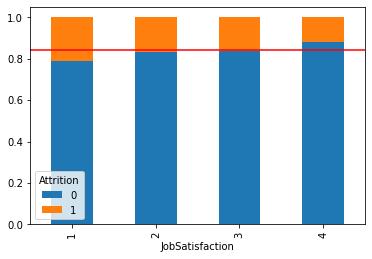

In [156]:
feature4_crosstab_index.plot.bar(stacked=True)

plt.axhline(1-data[target].mean(), color='r')
plt.show()

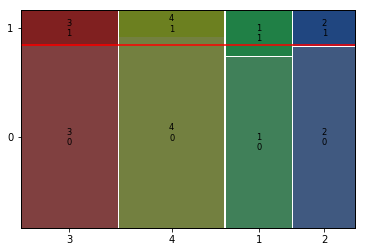

In [160]:
mosaic(data,[feature4,target])

plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [161]:
feature4_chi = spst.chi2_contingency(feature4_crosstab)

print('카이제곱통계량 :', feature4_chi[0])
print('p-value :', feature4_chi[1])

카이제곱통계량 : 9.63151465436614
p-value : 0.021972649369306214


> - 그래프상 약간의 평균차이가 있다.
> - p-value가 0.02197로 작은편이다.

> - 직무만족도가 이직에 영향을 미친다 볼 수 있다.(약한)

#### 2) feature5(RelationshipSatisfaction) --> target

In [162]:
feature5_crosstab = pd.crosstab(data[feature5], data[target])
feature5_crosstab

Attrition,0,1
RelationshipSatisfaction,,
1,183,47
2,217,41
3,337,60
4,313,52


In [164]:
feature5_crosstab_index = pd.crosstab(data[feature5], data[target], normalize='index')
feature5_crosstab_index

Attrition,0,1
RelationshipSatisfaction,,
1,0.795652,0.204348
2,0.841085,0.158915
3,0.848866,0.151134
4,0.857534,0.142466


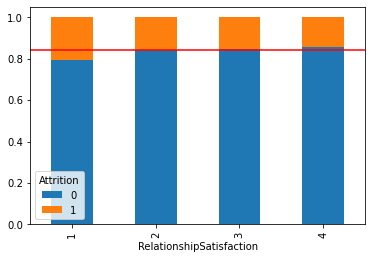

In [166]:
feature5_crosstab_index.plot.bar(stacked=True)

plt.axhline(1-data[target].mean(), color='r')
plt.show()

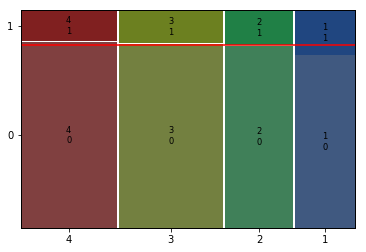

In [167]:
mosaic(data,[feature5,target])

plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [168]:
feature5_chi = spst.chi2_contingency(feature5_crosstab)

print('카이제곱통계량 :', feature5_chi[0])
print('p-value :', feature5_chi[1])

카이제곱통계량 : 4.435126158518535
p-value : 0.2181503949975081


> - 그래프상 약간의 평균차이는 있다.
> - p-value가 0.21815로 큰 편이다.

> - 동료와의 관계가 이직에 영향을 미친다 볼 수 없다.

#### 3) feature6(WorkLifeBalance) --> target

In [170]:
feature6_crosstab = pd.crosstab(data[feature6], data[target])
feature6_crosstab

Attrition,0,1
WorkLifeBalance,,
1,49,20
2,251,46
3,639,108
4,111,26


In [171]:
feature6_crosstab_index = pd.crosstab(data[feature6], data[target], normalize='index')
feature6_crosstab_index

Attrition,0,1
WorkLifeBalance,,
1,0.710145,0.289855
2,0.845118,0.154882
3,0.855422,0.144578
4,0.810219,0.189781


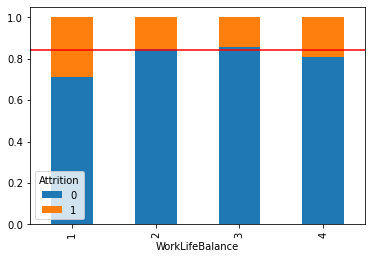

In [172]:
feature6_crosstab_index.plot.bar(stacked=True)

plt.axhline(1-data[target].mean(), color='r')
plt.show()

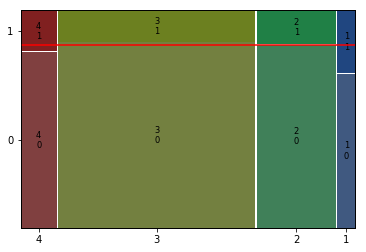

In [173]:
mosaic(data,[feature6,target])

plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [176]:
feature6_chi = spst.chi2_contingency(feature6_crosstab)

print('카이제곱통계량 :', feature6_chi[0])
print('p-value :', feature6_chi[1])

카이제곱통계량 : 10.940810822342664
p-value : 0.012050277390233675


> - 그래프상 평균차이가 있다.
> - p-value가 0.01205로 작은 편이다.

> - 워라밸이 이직에 영향을 미친다 볼 수 있다.(약한)

----

#### 4) 추가 feature4(OverTime) --> target

In [184]:
feature7_crosstab = pd.crosstab(data[feature7], data[target])
feature7_crosstab

Attrition,0,1
OverTime,,
No,803,93
Yes,247,107


In [185]:
feature7_crosstab_index = pd.crosstab(data[feature7], data[target], normalize='index')
feature7_crosstab_index

Attrition,0,1
OverTime,,
No,0.896205,0.103795
Yes,0.697740,0.302260


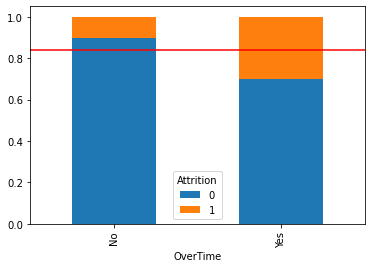

In [186]:
feature7_crosstab_index.plot.bar(stacked=True)

plt.axhline(1-data[target].mean(), color='r')
plt.show()

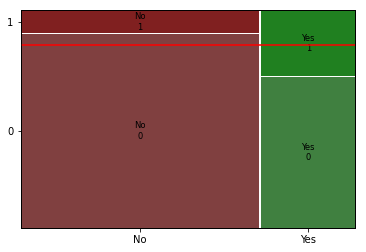

In [187]:
mosaic(data,[feature7,target])

plt.axhline(1-data[target].mean(), color='r')
plt.show()

In [188]:
feature7_chi = spst.chi2_contingency(feature7_crosstab)

print('카이제곱통계량 :', feature7_chi[0])
print('p-value :', feature7_chi[1])

카이제곱통계량 : 72.89605419432075
p-value : 1.366611233098835e-17


> - 그래프상 평균 차이가 있다.
> - p-value가 0에 가깝다.

> - 야근여부가 이직에 영향을 미친다 볼 수 있다.

----

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 2) feature1(DistanceFromHome) --> target

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1250 non-null   int32  
 1   Age                       1250 non-null   int64  
 2   DistanceFromHome          1196 non-null   float64
 3   Gender                    1250 non-null   object 
 4   JobSatisfaction           1250 non-null   int64  
 5   MaritalStatus             1250 non-null   object 
 6   MonthlyIncome             1250 non-null   int64  
 7   NumCompaniesWorked        1229 non-null   float64
 8   OverTime                  1250 non-null   object 
 9   PercentSalaryHike         1250 non-null   int64  
 10  RelationshipSatisfaction  1250 non-null   int64  
 11  TotalWorkingYears         1250 non-null   int64  
 12  WorkLifeBalance           1250 non-null   int64  
dtypes: float64(2), int32(1), int64(7), object(3)
memory usage: 122.

In [116]:
data_feature1 = data[data[feature1].notnull()]
data_feature1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1248
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1196 non-null   int32  
 1   Age                       1196 non-null   int64  
 2   DistanceFromHome          1196 non-null   float64
 3   Gender                    1196 non-null   object 
 4   JobSatisfaction           1196 non-null   int64  
 5   MaritalStatus             1196 non-null   object 
 6   MonthlyIncome             1196 non-null   int64  
 7   NumCompaniesWorked        1175 non-null   float64
 8   OverTime                  1196 non-null   object 
 9   PercentSalaryHike         1196 non-null   int64  
 10  RelationshipSatisfaction  1196 non-null   int64  
 11  TotalWorkingYears         1196 non-null   int64  
 12  WorkLifeBalance           1196 non-null   int64  
dtypes: float64(2), int32(1), int64(7), object(3)
memory usage: 126.

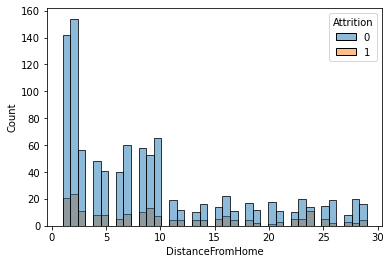

In [117]:
sns.histplot(data=data_feature1, x=feature1, hue=target, bins=40)
plt.show()

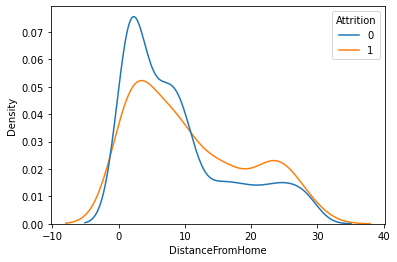

In [259]:
sns.kdeplot(data=data_feature1, x=feature1, hue=target, common_norm=False)
plt.show()

In [119]:
model = sm.Logit(data_feature1[target], data_feature1[feature1])
result1 = model.fit()
print(result1.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
DistanceFromHome    2.694280e-44
dtype: float64


> - 그래프상 교차지점은 없다. 
> - 그래프 차이가 크므로 영향이 있을 것이다.
> - p-value는 0에 가까우므로 영향이 있다.

> - 직장-집거리가 이직에 영향을 미친다 볼 수 있다.
> - 이직을 한 사람들 중 가까운 거리에 사는 사람이 먼 거리에 사는 사람보다 많이 이직하였다. 그 이유를 알아볼만 하다.

----

#### 2) feature2(MonthlyIncome) --> target

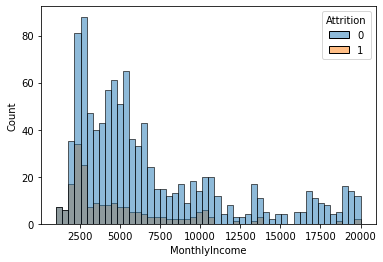

In [121]:
sns.histplot(data=data, x=feature2, hue=target, bins=50)
plt.show()

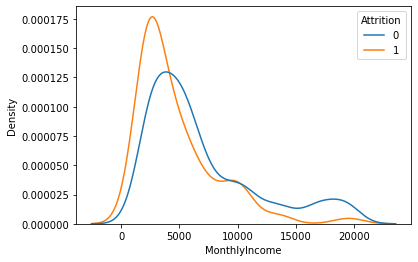

In [260]:
sns.kdeplot(data=data, x=feature2, hue=target, common_norm=False)
plt.show()

In [123]:
model = sm.Logit(data[target], data[feature2])
result1 = model.fit()
print(result1.pvalues)

Optimization terminated successfully.
         Current function value: 0.437401
         Iterations 6
MonthlyIncome    1.922717e-71
dtype: float64


> - 그래프상 교차지점은 없다.  
> - 그래프 차이가 크므로 영향이 있을 것이다.
> - p-value가 0에 가까우므로 영향이 있다.

> - 월급이 이직에 영향을 미친다 볼 수 있다.
> - 이직한 사람들 중 월급이 낮은 이직률이 월급이 높은 이직률보다 훨씬 많다. -> 월급 문제가 있을것으로 예상.
> - 이직간 차이가 증가하다가 감소하다가 다시 증가하는 것을 보인다. -> 15000달러 이상인 사람들의 안정도가 다르다 예상

----

#### 3) feature3(PercentSalaryHike) --> target

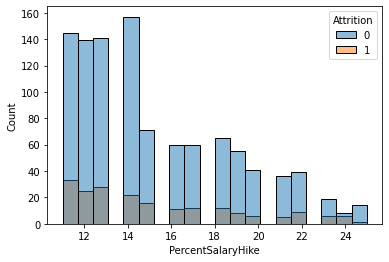

In [127]:
sns.histplot(data=data, x=feature3, hue=target, bins=20)
plt.show()

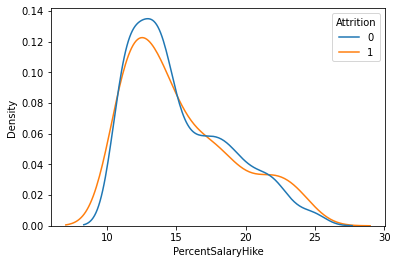

In [261]:
sns.kdeplot(data=data, x=feature3, hue=target, common_norm=False)
plt.show()

In [131]:
model = sm.Logit(data[target], data[feature3])
result1 = model.fit()
print(result1.pvalues)

Optimization terminated successfully.
         Current function value: 0.450230
         Iterations 5
PercentSalaryHike    3.979995e-95
dtype: float64


> - 그래프상 교차지점은 없다.
> - 그래프 차이가 크므로 영향이 있을 것이다.
> - p-value가 0에 가까우므로 영향이 있다.

> - 전년대비 급여인상률이 이직에 영향을 미친다.
> - 급여 인상률이 높아질수록 이직률의 차이가 작아진다. -> 인상률이 높은데 그 차이가 작아지는 이유는 뭐지?

----

#### 4) 추가 feature --> target

#### 5) 추가 feature --> target

## 4.관계 정리

### 1) 강한관계의 변수

> PercentSalaryHike(전년대비 급여인상률), DistanceFromHome(집-직장 거리), MonthlyIncome(월급), OverTime(야근여부)


### 2) 약한관계의 변수

> WorkLifeBalance(워라밸), JobSatisfaction(직무만족도)


### 3) 관계 없음

> RelationshipSatisfaction(동료와의 관계)

## 5.추가 분석